In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split # simpler to re-write and save a dependency

import scipy
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt

import glob
import time
import random
import xml.etree.ElementTree as ET


In [5]:
# Read XML annotations (mask perimeter)

def extract_annotations(path):
    tree = ET.parse(path)
    root = tree.getroot()
    image_nodes = root.findall("image")

    annotations = {}
    for image_node in image_nodes:
        name = image_node.attrib["name"]
        raw_str = image_node.find("polygon").attrib["points"]

        pts_str = raw_str.split(";")
        pts = []
        for pt in pts_str:
            x,y = pt.split(",")
            x,y = int(float(x)), int(float(y))
            pts.append([[x,y]])
        
    
        annotations[name] = np.array(pts)
        
    return annotations
    
if __name__ == "__main__":
    annotations = extract_annotations('Data/annotations.xml')
    print(list(annotations))
    name = list(annotations)[0]

['StarcraftTerranBuildOrder.JPG']


[[[129 174]]

 [[131  89]]

 [[159  48]]

 [[270  41]]

 [[356  61]]

 [[336 172]]

 [[349 211]]

 [[347 259]]

 [[347 290]]

 [[339 327]]

 [[334 357]]

 [[310 372]]

 [[256 381]]

 [[192 382]]

 [[152 357]]

 [[141 318]]

 [[129 264]]

 [[142 235]]

 [[146 209]]

 [[122 200]]

 [[137 189]]

 [[125 183]]

 [[129 175]]]


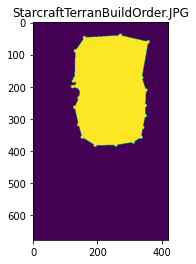

In [7]:
# Build Mask from points
pts = annotations[name]
print(pts)
mask = np.zeros((677, 421))
cv2.drawContours(mask, pts, contourIdx=-1, color = (1),thickness=10)
cv2.drawContours(mask, [pts], contourIdx=-1, color = (1),thickness=1)
cv2.fillPoly(mask, [pts], color = (1))
plt.title(name)
plt.imshow(mask)